In [86]:
!pip install imbalanced-learn scikit-learn

In [87]:
import pandas as pd
import numpy as np

In [88]:
from google.colab import drive
drive.mount("/content/ggdrive")

Drive already mounted at /content/ggdrive; to attempt to forcibly remount, call drive.mount("/content/ggdrive", force_remount=True).


In [89]:
df=pd.read_csv("/content/ggdrive/MyDrive/ml/akiDataset2.csv")

In [90]:
df

,Date,Age,Gender,ASAgr,Emer_surg,BW(kg),Height(cm),BMI,HT,DM,...,Lowest MAP,Hypoxemia,Hypercarbia,Pre Hb(g/dl),Alb,PreCr,PreGFR,offETT,AKI,NLR1
0,10/2/2021,51,0,1,1,52.0,162,19.81405,0.0,0.0,...,68.33334,0,1,11.3,2.9,0.54,109.61,NaN,NaN,3.628141
1,10/3/2021,74,0,2,0,62.0,151,27.19179,1.0,0.0,...,63.33333,0,0,12,4.3,0.99,56.31,NaN,NaN,1.592593
2,29/3/2021,76,0,2,0,56.0,153,23.92242,1.0,1.0,...,58.33333,0,0,9.1,3.7,0.72,81.6,0.0,NaN,4.853503
3,10/1/2022,60,1,0,0,54.0,160,21.09375,0.0,0.0,...,NaN,0,0,15.4,4.5,1.01,80.47,NaN,NaN,.
4,17/1/2022,40,1,1,0,65.0,170,22.49135,0.0,0.0,...,60.00000,0,0,13.7,4,1.05,88.36,0.0,NaN,3.731183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,26/7/2023,71,1,2,0,45.0,170,15.57093,0.0,NaN,...,51.66667,0,0,7.6,2.9,1.24,58.12,0.0,3.0,10.46154
1943,8/8/2023,86,1,2,1,65.0,170,22.49135,0.0,0.0,...,73.33334,0,0,10.1,2.3,1,67.84,2.0,3.0,5.170068
1944,7/9/2023,43,0,2,1,49.0,160,19.14063,1.0,0.0,...,53.33333,0,0,5.4,1.7,2.39,24.12,2.0,3.0,12.42029
1945,26/9/2023,34,0,2,1,58.0,175,18.93878,0.0,1.0,...,50.00000,1,1,9.8,2.4,0.36,141.14,3.0,3.0,14.36667


In [91]:
df=df.drop(columns=["Date"])
df = df.dropna(subset=['AKI'])

In [92]:
for i in df.columns:
    if df[i].dtype == 'object':
      df[i] = df[i].astype(str).str.replace(',', '')
      df[i] = pd.to_numeric(df[i], errors='coerce')

In [93]:
df = df.fillna(df.mean())

In [94]:
y=df["AKI"]
x=df.drop(columns=["AKI"])
x

,Age,Gender,ASAgr,Emer_surg,BW(kg),Height(cm),BMI,HT,DM,DLP,...,LowestDBP,Lowest MAP,Hypoxemia,Hypercarbia,Pre Hb(g/dl),Alb,PreCr,PreGFR,offETT,NLR1
9,52.0,1,2,1,60.0,163.0,22.58271,0.0,0.000000,0.0,...,50.0,63.33333,0,0,10.1,2.5,0.50,197.14,0.0,11.442860
10,70.0,1,2,1,40.0,150.0,17.77778,0.0,0.000000,0.0,...,45.0,58.33333,0,1,9.2,2.9,1.20,67.58,2.0,18.979170
11,83.0,1,1,0,52.0,170.0,17.99308,0.0,0.000000,0.0,...,50.0,62.66667,0,1,12.2,3.4,1.10,72.18,2.0,3.179612
12,49.0,1,2,0,65.0,170.0,22.49135,0.0,0.000000,0.0,...,52.0,64.66666,0,1,11.6,3.1,0.80,116.00,2.0,1.314024
13,39.0,1,1,1,95.0,180.0,29.32099,0.0,0.000000,0.0,...,60.0,80.00000,0,1,14.3,1.9,1.20,76.10,0.0,9.440477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,71.0,1,2,0,45.0,170.0,15.57093,0.0,0.148397,0.0,...,45.0,51.66667,0,0,7.6,2.9,1.24,58.12,0.0,10.461540
1943,86.0,1,2,1,65.0,170.0,22.49135,0.0,0.000000,0.0,...,60.0,73.33334,0,0,10.1,2.3,1.00,67.84,2.0,5.170068
1944,43.0,0,2,1,49.0,160.0,19.14063,1.0,0.000000,0.0,...,40.0,53.33333,0,0,5.4,1.7,2.39,24.12,2.0,12.420290
1945,34.0,0,2,1,58.0,175.0,18.93878,0.0,1.000000,0.0,...,40.0,50.00000,1,1,9.8,2.4,0.36,141.14,3.0,14.366670


In [95]:
y.value_counts()

,count
AKI,
0.0,1624
1.0,186
2.0,104
3.0,24


In [96]:
from imblearn.over_sampling import KMeansSMOTE
kmeans_smote = KMeansSMOTE(
    kmeans_estimator=100,
    random_state=42,
    cluster_balance_threshold=0.005
)

x2, y2 = kmeans_smote.fit_resample(x, y)

In [97]:
y2.value_counts()

,count
AKI,
1.0,1646
2.0,1629
0.0,1624
3.0,1624


In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler =StandardScaler()

In [99]:
x2.describe()

,Age,Gender,ASAgr,Emer_surg,BW(kg),Height(cm),BMI,HT,DM,DLP,...,LowestDBP,Lowest MAP,Hypoxemia,Hypercarbia,Pre Hb(g/dl),Alb,PreCr,PreGFR,offETT,NLR1
count,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,...,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000
mean,59.030662,0.268588,1.131075,0.153610,55.316338,159.489869,21.725879,0.281580,0.099132,0.190066,...,49.609646,61.780037,0.011958,0.178292,11.371992,3.324902,0.944203,83.770806,0.942766,5.897597
std,13.390781,0.443259,0.586432,0.360602,9.439012,17.963342,2.970949,0.404038,0.267671,0.340016,...,8.229721,9.252128,0.151182,0.417651,1.703711,0.861194,0.354985,26.517123,1.118162,5.621044
min,18.000000,0.000000,0.000000,0.000000,5.000000,138.000000,0.175664,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.180000,8.120000,0.000000,0.334314
25%,50.424866,0.000000,1.000000,0.000000,49.218628,154.487605,19.931587,0.000000,0.000000,0.000000,...,44.921485,56.666670,0.000000,0.000000,10.200000,2.559009,0.720000,63.275240,0.000000,2.378188
50%,59.085041,0.000000,1.000000,0.000000,53.159068,158.524190,21.431942,0.000000,0.000000,0.000000,...,50.000000,61.546120,0.000000,0.000000,11.184029,3.500000,0.886041,87.053140,0.130496,4.134762
75%,67.457669,1.000000,1.000000,0.000000,61.000000,163.729501,23.148150,0.625504,0.000000,0.231012,...,54.746594,68.087309,0.000000,0.000000,12.585773,4.034567,1.110000,101.863500,2.000000,8.495716
max,89.000000,1.000000,2.000000,1.000000,152.000000,1509.000000,55.831040,1.000000,1.000000,1.000000,...,95.000000,105.000000,9.000000,11.000000,19.200000,5.300000,8.860000,306.580000,7.000000,119.625000


In [100]:
x2 = scaler.fit_transform(x2)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

In [102]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [103]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('model', LogisticRegression())
])

In [104]:
xTrain,xTest,yTrain,yTest=train_test_split(x2,y2,test_size=0.3,random_state=42)

In [105]:
xTrain.shape

(4566, 50)

In [106]:
yTrain.shape

(4566,)

In [107]:
pipe_lr = Pipeline([
    ('clf', LogisticRegression(max_iter=1000))
])
param_lr = {
    'clf__C': [1.15, 1.2, 1.25, 1.3],
    'clf__solver': ['lbfgs', 'liblinear']
}
grid_lr = GridSearchCV(pipe_lr, param_lr, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(xTrain, yTrain)
print("Best params:", grid_lr.best_params_)
print("Best CV accuracy:", grid_lr.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'clf__C': 1.3, 'clf__solver': 'liblinear'}
Best CV accuracy: 0.9016644765659221


In [108]:
pipe_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])
param_rf = {
    'clf__n_estimators': [50, 100, 150],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(xTrain, yTrain)
print("Best params:", grid_rf.best_params_)
print("Best CV accuracy:", grid_rf.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best CV accuracy: 0.9441524310118266


In [109]:
pipe_xgb = Pipeline([
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])
param_xgb = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5],
    'clf__learning_rate': [0.01, 0.1]
}
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(xTrain, yTrain)
print("Best params:", grid_xgb.best_params_)
print("Best CV accuracy:", grid_xgb.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:33:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 200}
Best CV accuracy: 0.9467805519053877


In [110]:
pipe_svm = Pipeline([
    ('clf', SVC(probability=True))
])
param_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm.fit(xTrain, yTrain)
print("Best params:", grid_svm.best_params_)
print("Best CV accuracy:", grid_svm.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best params: {'clf__C': 10, 'clf__kernel': 'rbf'}
Best CV accuracy: 0.9432763907139728


In [115]:
import joblib

In [116]:
joblib.dump(grid_lr, 'LogisticRegression.sav')
joblib.dump(grid_rf, 'RandomForest.sav')
joblib.dump(grid_xgb, 'XGBoost.sav')
joblib.dump(grid_svm, 'SVM.sav')

['SVM.sav']

In [117]:
joblib.dump(scaler, 'stdScaler.pkl')

['stdScaler.pkl']

# NLP

In [154]:
from tensorflow.keras.models import Sequential

nlp = Sequential()
nlp.add(layers.Dense(64, input_shape=(50,)))
nlp.add(layers.BatchNormalization())
nlp.add(layers.Activation('relu'))
nlp.add(layers.Dropout(0.1))

nlp.add(layers.Dense(16))
nlp.add(layers.BatchNormalization())
nlp.add(layers.Activation('relu'))
nlp.add(layers.Dropout(0.1))

nlp.add(layers.Dense(4, activation='softmax'))
nlp.summary()

adamm = Adam(learning_rate=0.005)
nlp.compile(optimizer=adamm, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,692 (18.33 KB)

 Trainable params: 4,532 (17.70 KB)

 Non-trainable params: 160 (640.00 B)

In [155]:
history = nlp.fit(xTrain, yTrain, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7331 - loss: 0.7986 - val_accuracy: 0.9081 - val_loss: 0.2781
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9123 - loss: 0.2982 - val_accuracy: 0.9256 - val_loss: 0.2294
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9122 - loss: 0.2575 - val_accuracy: 0.9267 - val_loss: 0.2279
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9424 - loss: 0.1951 - val_accuracy: 0.9322 - val_loss: 0.2119
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9294 - loss: 0.2223 - val_accuracy: 0.9322 - val_loss: 0.2126
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9273 - loss: 0.2156 - val_accuracy: 0.9311 - val_loss: 0.2217
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9410 - loss: 0.1792 - val_accuracy: 0.9300 - val_loss: 0.2243
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9479 - loss: 0.1621 - val_accuracy

In [135]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [126]:
y_pred = grid_lr.best_estimator_.predict(xTest)
f1 = f1_score(yTest, y_pred, average='macro')
acc = accuracy_score(yTest, y_pred)

print("Accuracy:", acc)
print("F1 Score (multi-class):", f1)

Accuracy: 0.888605007664793
F1 Score (multi-class): 0.8896754798962955


In [127]:
y_pred = grid_rf.best_estimator_.predict(xTest)
f1 = f1_score(yTest, y_pred, average='macro')
acc = accuracy_score(yTest, y_pred)

print("Accuracy:", acc)
print("F1 Score (multi-class):", f1)

Accuracy: 0.9555442003065917
F1 Score (multi-class): 0.9569867847036335


In [128]:
y_pred = grid_xgb.best_estimator_.predict(xTest)
f1 = f1_score(yTest, y_pred, average='macro')
acc = accuracy_score(yTest, y_pred)

print("Accuracy:", acc)
print("F1 Score (multi-class):", f1)

Accuracy: 0.9483903934593766
F1 Score (multi-class): 0.9496122000843285


In [129]:
y_pred = grid_svm.best_estimator_.predict(xTest)
f1 = f1_score(yTest, y_pred, average='macro')
acc = accuracy_score(yTest, y_pred)

print("Accuracy:", acc)
print("F1 Score (multi-class):", f1)

Accuracy: 0.9504343382728666
F1 Score (multi-class): 0.9518126963662215


In [156]:
y_pred = nlp.predict(xTest)
y_pred = y_pred.argmax(axis=1)

f1 = f1_score(yTest, y_pred, average='macro')
acc = accuracy_score(yTest, y_pred)

print("Accuracy:", acc)
print("F1 Score (multi-class):", f1)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9315278487480838
F1 Score (multi-class): 0.9329624089292017


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


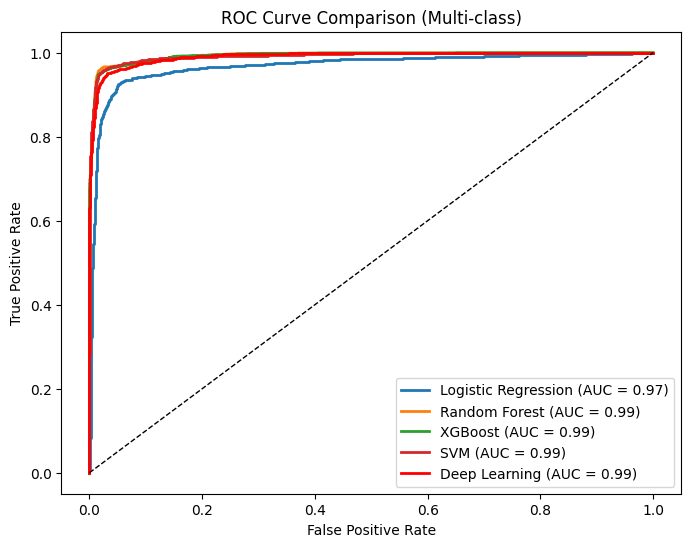

In [157]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

n_classes = 4
classes = [0.0, 1.0, 2.0, 3.0]

models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "XGBoost": grid_xgb.best_estimator_,
    "SVM": grid_svm.best_estimator_,
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(xTest)
    y_test_bin = label_binarize(yTest, classes=classes)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

y_pred_prob_dl = nlp.predict(xTest)
y_test_bin = label_binarize(yTest, classes=classes)
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob_dl.ravel())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label=f"Deep Learning (AUC = {roc_auc:.2f})", color='red')

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.title("ROC Curve Comparison (Multi-class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [158]:
joblib.dump(nlp, 'NLP.sav')

['NLP.sav']